# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
Cities = []
MaxTemp = []
Humidity = []
Lat = []
Lng = []
Cloudiness = []
WindSpeed = []
Date = []
Country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        MaxTemp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        WindSpeed.append(response["wind"]["speed"])
        Date.append(response["dt"])
        Country.append(response["sys"]["country"])
        Cities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        

City processed: kapaa
City processed: punta arenas
City processed: acarau
City processed: hermanus
City processed: bethel
City processed: hasaki
City processed: rikitea
City processed: tomatlan
City processed: itarema
City processed: mataura
City processed: esperance
City processed: ushuaia
City processed: berlevag
City processed: port lincoln
City processed: revelstoke
City processed: pangody
City processed: buraydah
City processed: mahebourg
City processed: arraial do cabo
City NOT found: belushya guba
City NOT found: nguiu
City processed: asau
City NOT found: marcona
City processed: biscarrosse
City processed: busselton
City processed: arrecife
City processed: sibu
City processed: nelson bay
City processed: albany
City processed: airai
City processed: vila velha
City processed: kodiak
City processed: chester
City processed: rio gallegos
City processed: zabid
City processed: aksarka
City processed: kristiansund
City processed: hobart
City processed: luderitz
City NOT found: taolanaro

City processed: malanje
City processed: okato
City processed: parelhas
City NOT found: burica
City processed: belaya gora
City processed: lorengau
City processed: anchorage
City processed: zuwarah
City NOT found: doctor pedro p. pena
City processed: karratha
City processed: sabha
City processed: ponta do sol
City processed: broken hill
City processed: poum
City processed: upernavik
City processed: hargeysa
City processed: caravelas
City processed: adrar
City processed: liloy
City processed: hami
City processed: aklavik
City processed: yanam
City processed: punta cardon
City processed: mazyr
City processed: hidalgo
City processed: souillac
City processed: aykhal
City processed: jumla
City processed: kurumkan
City processed: prince george
City processed: tasiilaq
City processed: khandyga
City processed: kasongo-lunda
City processed: alicia
City processed: sitka
City processed: manono
City NOT found: grand centre
City processed: lyngseidet
City processed: clarksdale
City processed: haines

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [75]:
Weather_DF = pd.DataFrame({"City": Cities,
                           "Latitude": Lat,
                           "Longitude": Lng,
                           "Temperature": MaxTemp,
                           "Humidity": Humidity,
                           "Cloudiness": Cloudiness,
                           "Windspeed": WindSpeed,
                           "Country": Country,
                           "Date": Date
                          })



In [35]:
len(Cities)

578

In [76]:
# Weather_DF.to_csv("C:/Users/jyesu_000/OneDrive/Desktop/GitClones/python-api-challenge/output_data/cities.csv", index = False)
Weather_DF.to_csv("../output_data/cities.csv", index=False)

Weather_DF

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,kapaa,22.0752,-159.3190,84.18,65,20,21.85,US,1650327319
1,punta arenas,-53.1500,-70.9167,48.31,76,75,12.66,CL,1650327191
2,acarau,-2.8856,-40.1200,76.96,89,99,8.03,BR,1650327230
3,hermanus,-34.4187,19.2345,61.81,93,4,10.40,ZA,1650327320
4,bethel,41.3712,-73.4140,45.45,70,100,10.36,US,1650327110
...,...,...,...,...,...,...,...,...,...
573,bone,51.9669,12.1396,44.82,71,90,5.95,DE,1650327513
574,chabahar,25.2919,60.6430,79.23,69,45,4.50,IR,1650327514
575,destin,30.3935,-86.4958,69.06,70,0,23.00,US,1650327463
576,golden gate,26.1879,-81.6951,82.42,66,0,12.66,US,1650327514


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [77]:
high_humidity = Weather_DF[(Weather_DF['Humidity'] > 100)]
high_humidity

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windspeed,Country,Date


In [79]:
# Weather_DF = pd.read_csv("../output_data/cities.csv")

city_data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# city_data.to_csv("../output_data/city_data.csv", index = False)


city_data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,kapaa,US,22.0752,84.18,65,20,21.85,1650327319
1,punta arenas,CL,-53.1500,48.31,76,75,12.66,1650327191
2,acarau,BR,-2.8856,76.96,89,99,8.03,1650327230
3,hermanus,ZA,-34.4187,61.81,93,4,10.40,1650327320
4,bethel,US,41.3712,45.45,70,100,10.36,1650327110


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

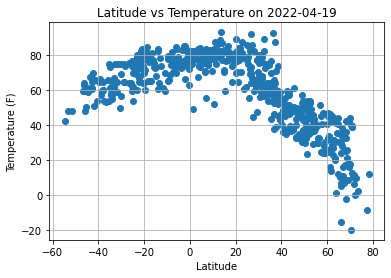

In [82]:
#format the max date in the dataset as "runDate" for graph titles
end_date = city_data["Date"].max()
date = datetime.utcfromtimestamp(end_date).strftime('%Y-%m-%d')

#set data to plot
x = city_data["Latitude"]
y = city_data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {date}.png')
#display plot!
plt.show()

## Latitude vs. Humidity Plot

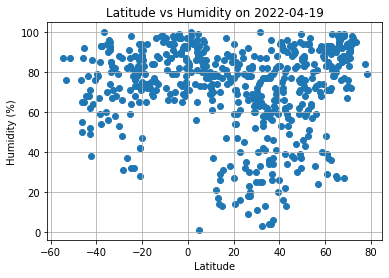

In [86]:
#set data to plot; retain Latitude from previous plot as "x"
y = city_data["Humidity"]
plt.scatter(x,y)
plt.title(f"Latitude vs Humidity on {date}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {date}.png')
plt.show()

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

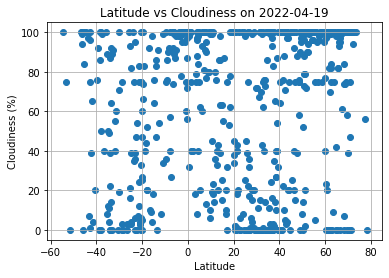

In [87]:
y2 = city_data["Cloudiness"]
plt.scatter(x,y2)
plt.title(f"Latitude vs Cloudiness on {date}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {date}.png')
plt.show

There is absolutely no correlation between the Latitude and Cloudiness

## Latitude vs. Wind Speed Plot

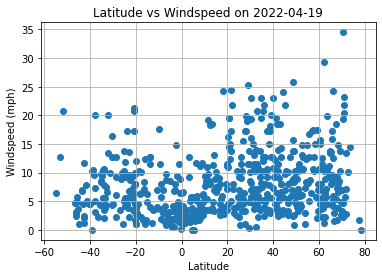

In [89]:
y3 = city_data["Windspeed"]
plt.scatter(x,y3)
plt.title(f"Latitude vs Windspeed on {date}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {date}.png')
plt.show()

## Linear Regression

In [94]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [92]:
Northern = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8722153565250323
y = -0.97x + 91.3


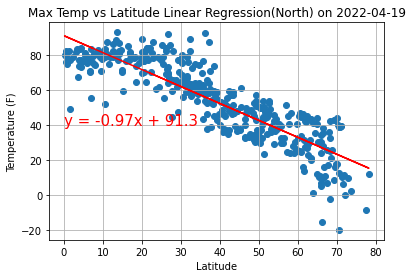

In [99]:
x_values = Northern["Latitude"]
y_values = Northern["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Max Temp vs Latitude Linear Regression(North) on {date}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Max Temp vs Latitude Linear Regression on {date}.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.6854666037249956
y = 0.46x + 80.03


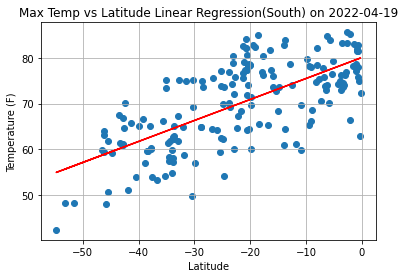

In [98]:
x_values = Southern["Latitude"]
y_values = Southern["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Max Temp vs Latitude Linear Regression(South) on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {date}.png')
plt.show()

The scatter plot maps Northern and Southern cities' temperature against their latitude. The result for both the Northern/Southern hemisphere reveals a strong correlation between distance from the equator temperature. The closer to the equator, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.15199183482421977
y = 0.17x + 62.97


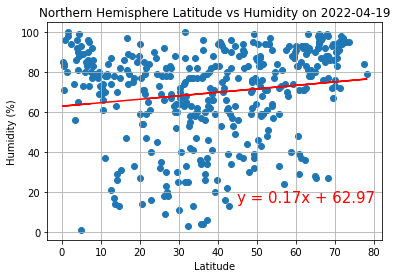

In [100]:
x_values = Northern["Latitude"]
y_values = Northern["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity on {date}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.27593655792250754
y = 0.31x + 85.03


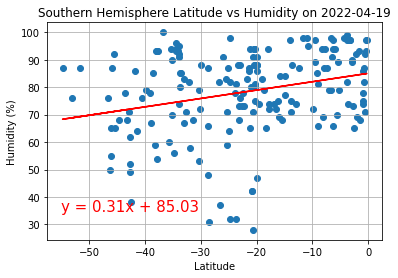

In [101]:
x_values = Southern["Latitude"]
y_values = Southern["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f'Southern Hemisphere Latitude vs Humidity on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on {date}.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.1549537377401449
y = 0.31x + 48.75


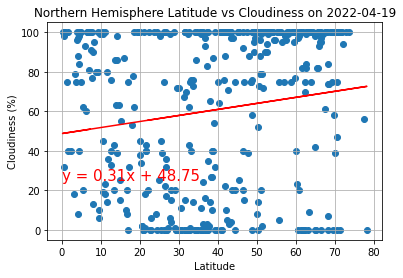

In [102]:
x_values = Northern["Latitude"]
y_values = Northern["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {date}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.27249782406235756
y = 0.74x + 74.62


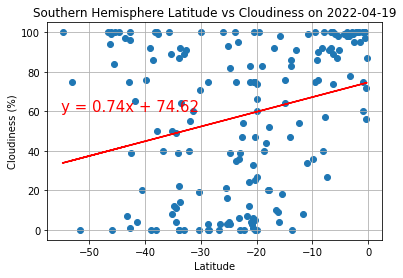

In [103]:
x_values = Southern["Latitude"]
y_values = Southern["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {date}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.16240178336773023
y = 0.05x + 7.0


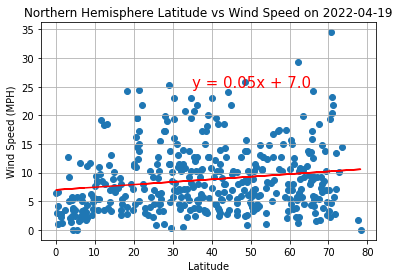

In [104]:
x_values = Northern["Latitude"]
y_values = Northern["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {date}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.19189177028239124
y = -0.06x + 5.12


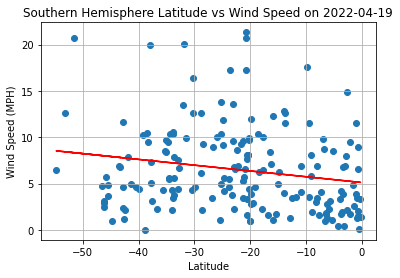

In [105]:
x_values = Southern["Latitude"]
y_values = Southern["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {date}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {date}.png')
plt.show()

The result for both Northern/Southern wind speed reveals no correlation between latitude and wind speed. Data points are plotted all around the graph. 